In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import nltk
nlp=spacy.load("en_core_web_lg")
pd.set_option("display.max_rows",None)
nltk.download("vader_lexicon")
nltk.download("punkt")
import re

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\25bak\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\25bak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [186]:
train=pd.read_csv("Data/train.csv")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [187]:
test=pd.read_csv("Data/test.csv")
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [188]:
print("Null values in training set")
print(train.isnull().sum())
print("Null values in testing set")
print(test.isnull().sum())

Null values in training set
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
Null values in testing set
id             0
keyword       26
location    1105
text           0
dtype: int64


In [189]:
print(train[["keyword","text"]].sample(10))

                  keyword                                               text
1822              crashed  My iPod crashed..... \n#WeLoveYouLouis \n#MTVH...
3638           fatalities  OSP concerned about mounting fatalities http:/...
3888            flattened  @GrabakaHitman @Izi_Garcia when he flattened m...
4478             hostages  New #Free #Porn #Clip! Taking Of Hostages Dang...
1196  buildings%20burning  'i'm a Gemini' *children screaming buildings b...
467                attack  Notley's tactful yet very direct response to H...
5254          oil%20spill  SYD traffic HAZARD Oil spill - BANKSTOWN Stace...
6421     suicide%20bomber  @bbclaurak Why is no one talking about the ris...
1606             collapse  I get this feeling that society will collapse ...
2507           desolation  ? This Weekend: Stockholm Sweden - Aug 8 at Co...


In [190]:
train_real=train[train["target"]==1]
train_fake=train[train["target"]==0]

In [191]:
print(train_real.shape," is the size of real train dataset")
print(train_fake.shape," is the size of fake train dataset")

(3271, 5)  is the size of real train dataset
(4342, 5)  is the size of fake train dataset


In [192]:
print(train_real["keyword"].nunique(),train_fake["keyword"].nunique())
print(test["keyword"].nunique())
print(set(train.keyword.unique())-set(test.keyword.unique()))

220 218
221
set()


In [193]:
impWords=train["keyword"].unique()[:15]
print(impWords)

[nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked']


In [194]:
# plt.figure(figsize=(15,10))
# sns.countplot(x=train["keyword"],hue=train["target"])
# plt.xticks(rotation=90)

In [195]:
unique=train["keyword"].unique().astype("str")
unique.tolist()
# uniqueCollection=[unique[i:i+15] 
#                   for i in range(0,len(unique),15)]
# plt.figure(figsize=(10,15))
# subplot_counter=1
# for group in uniqueCollection:
#     plt.figure(figsize=(10,15))
#     plt.subplot(len(uniqueCollection),1,subplot_counter)
#     countplot=sns.countplot(data=train[train["keyword"].isin(group)],x="keyword",hue="target")
#     plt.xticks(rotation=90)
#     plt.legend(title="target",loc="lower left")

['nan',
 'ablaze',
 'accident',
 'aftershock',
 'airplane%20accident',
 'ambulance',
 'annihilated',
 'annihilation',
 'apocalypse',
 'armageddon',
 'army',
 'arson',
 'arsonist',
 'attack',
 'attacked',
 'avalanche',
 'battle',
 'bioterror',
 'bioterrorism',
 'blaze',
 'blazing',
 'bleeding',
 'blew%20up',
 'blight',
 'blizzard',
 'blood',
 'bloody',
 'blown%20up',
 'body%20bag',
 'body%20bagging',
 'body%20bags',
 'bomb',
 'bombed',
 'bombing',
 'bridge%20collapse',
 'buildings%20burning',
 'buildings%20on%20fire',
 'burned',
 'burning',
 'burning%20buildings',
 'bush%20fires',
 'casualties',
 'casualty',
 'catastrophe',
 'catastrophic',
 'chemical%20emergency',
 'cliff%20fall',
 'collapse',
 'collapsed',
 'collide',
 'collided',
 'collision',
 'crash',
 'crashed',
 'crush',
 'crushed',
 'curfew',
 'cyclone',
 'damage',
 'danger',
 'dead',
 'death',
 'deaths',
 'debris',
 'deluge',
 'deluged',
 'demolish',
 'demolished',
 'demolition',
 'derail',
 'derailed',
 'derailment',
 'desolat

In [196]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment=SentimentIntensityAnalyzer()

In [197]:
def lastKeyIn(info):
    keyword=info[0]
    text=info[1]
    if pd.notna(keyword):
         return keyword
    doc=nlp(text)
    high_neg=0
    negative_word=None
    for word in doc:
        if word.is_stop or word.is_oov or word.is_space or word.is_punct:
             pass
        elif word.is_ascii:
            if word.text in unique or word.lemma_ in unique:
                return word
            neg=sentiment.polarity_scores(word.text)["neg"]
            if neg>high_neg:
                  high_neg=neg
                  negative_word=word
    if high_neg<0.5:
         return("Others")
    return negative_word.lower

In [198]:
print(train.isnull().sum())
train.keyword=train[["keyword","text"]].apply(lastKeyIn,axis=1)
print(train.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


id             0
keyword        0
location    2533
text           0
target         0
dtype: int64


In [199]:
keyword=train.keyword.unique().astype("str")
keyword=keyword.tolist()
keyword=set(keyword)
keyword

{'10595077177392105327',
 '1228720749737493560',
 '13773067740709375554',
 '14012806951969610844',
 '1523267725910686442',
 '7886921362353864828',
 '920492170430266568',
 'CYCLONE',
 'Damage',
 'Earthquake',
 'Evacuation',
 'FIRE',
 'Others',
 'Seismic',
 'Thunderstorm',
 'ablaze',
 'accident',
 'aftershock',
 'airplane%20accident',
 'ambulance',
 'annihilated',
 'annihilation',
 'apocalypse',
 'armageddon',
 'army',
 'arson',
 'arsonist',
 'attack',
 'attacked',
 'avalanche',
 'battle',
 'bioterror',
 'bioterrorism',
 'blaze',
 'blazing',
 'bleeding',
 'blew%20up',
 'blight',
 'blizzard',
 'blood',
 'bloody',
 'blown%20up',
 'body%20bag',
 'body%20bagging',
 'body%20bags',
 'bomb',
 'bombed',
 'bombing',
 'bridge%20collapse',
 'buildings%20burning',
 'buildings%20on%20fire',
 'burned',
 'burning',
 'burning%20buildings',
 'bush%20fires',
 'casualties',
 'casualty',
 'catastrophe',
 'catastrophic',
 'chemical%20emergency',
 'cliff%20fall',
 'collapse',
 'collapsed',
 'collide',
 'colli

In [200]:
train.head()

,id,keyword,location,text,target
0,1,earthquake,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,fire,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,evacuation,NaN,All residents asked to 'shelter in place' are ...,1
3,6,wildfires,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,smoke,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [201]:
countries=train.location.unique().tolist()
print(len(countries))

3342


In [202]:
print(countries[1:10])

['Birmingham', 'Est. September 2012 - Bristol', 'AFRICA', 'Philadelphia, PA', 'London, UK', 'Pretoria', 'World Wide!!', 'Paranaque City', 'Live On Webcam']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'New York'),
  Text(2, 0, 'United States'),
  Text(3, 0, 'London'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Nigeria'),
  Text(6, 0, 'UK'),
  Text(7, 0, 'Los Angeles, CA'),
  Text(8, 0, 'India'),
  Text(9, 0, 'Mumbai'),
  Text(10, 0, 'Washington, DC'),
  Text(11, 0, 'Kenya'),
  Text(12, 0, 'Worldwide'),
  Text(13, 0, 'Australia'),
  Text(14, 0, 'Chicago, IL')])

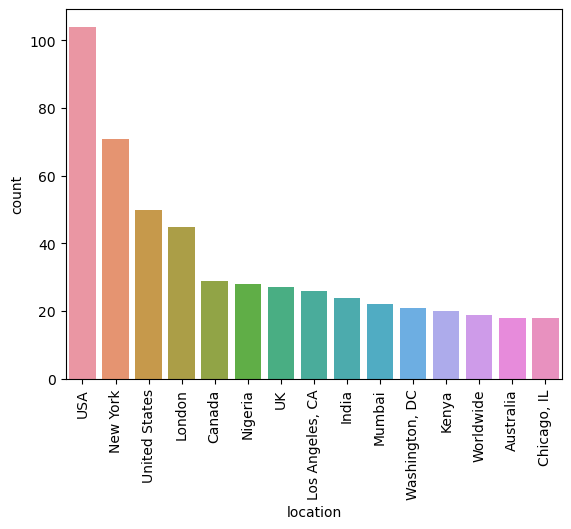

In [203]:
sns.countplot(x=train["location"],order=train.location.value_counts().iloc[:15].index)
plt.xticks(rotation=90)

In [204]:
train.head()

,id,keyword,location,text,target
0,1,earthquake,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,fire,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,evacuation,NaN,All residents asked to 'shelter in place' are ...,1
3,6,wildfires,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,smoke,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [205]:
text_to_train=train.text[3]

In [206]:
def location(cols):
    location=cols[0]
    text=cols[1]
    if pd.notna(location):
        return location
    text=nlp(text)
    for word in text.ents :
        if word.label_ in ["GPE","LOC"]:
            return word.text
    return "Others"

In [207]:
train["location"]=train[["location","text"]].apply(location,axis=1)

In [208]:
def cleanLocation(x):
    if x == 'Others':
        return 'Others'
    elif x == 'Earth' or x =='Worldwide' or x == 'Everywhere':
        return 'World'
    elif 'New York' in x or 'NYC' in x:
        return 'New York'    
    elif 'London' in x:
        return 'London'
    elif 'Mumbai' in x:
        return 'Mumbai'
    elif 'Washington' in x and 'D' in x and 'C' in x:
        return 'Washington DC'
    elif 'San Francisco' in x:
        return 'San Francisco'
    elif 'Los Angeles' in x:
        return 'Los Angeles'
    elif 'Seattle' in x:
        return 'Seattle'
    elif 'Chicago' in x:
        return 'Chicago'
    elif 'Toronto' in x:
        return 'Toronto'
    elif 'Sacramento' in x:
        return 'Sacramento'
    elif 'Atlanta' in x:
        return 'Atlanta'
    elif 'California' in x:
        return 'California'
    elif 'Florida' in x:
        return 'Florida'
    elif 'Texas' in x:
        return 'Texas'
    elif 'United States' in x or 'USA' in x:
        return 'USA'
    elif 'United Kingdom' in x or 'UK' in x or 'Britain' in x:
        return 'UK'
    elif 'Canada' in x:
        return 'Canada'
    elif 'India' in x:
        return 'India'
    elif 'Kenya' in x:
        return 'Kenya'
    elif 'Nigeria' in x:
        return 'Nigeria'
    elif 'Australia' in x:
        return 'Australia'
    elif 'Indonesia' in x:
        return 'Indonesia'
    else:
        return x

In [209]:
train["location"]=train["location"].apply(cleanLocation)

In [210]:
train.head()

,id,keyword,location,text,target
0,1,earthquake,Others,Our Deeds are the Reason of this #earthquake M...,1
1,4,fire,Canada,Forest fire near La Ronge Sask. Canada,1
2,5,evacuation,Others,All residents asked to 'shelter in place' are ...,1
3,6,wildfires,California,"13,000 people receive #wildfires evacuation or...",1
4,7,smoke,Alaska,Just got sent this photo from Ruby #Alaska as ...,1


In [211]:
location=train.location.unique().tolist()

In [212]:
len(location)

3026

In [213]:
train.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [214]:
# def extractInformation(text):
#     hashWords=[]
#     hash_seq="#(\w+)"
#     hash_count=0
#     text=re.findall(hash_seq,text)
#     for word in text:
#         hash_count+=1  
#         hashWords.append(str(word))
#     return hashWords
# hashtagWords=extractInformation("Hi this is a beatuiful morning #hot #sunny")

In [215]:
def extractInformation(text):
    hash_seq="#(\w+)"
    text=re.findall(hash_seq,text)
    if text==[]:
        return []
    return text
hashtagWords=extractInformation("Hi this is a beatuiful morning hot sunny")

In [216]:
def hashMod(text):
    words=[]
    for word in text:
        if word in keyword:
            words.append(word)
    if words is not []:
        return words
    if text==[]:
        return("None")
    if words is []:
        return text
    

In [217]:
train["HashtagWords"]=train["text"].apply(extractInformation)
train["HashtagWords"]=train["HashtagWords"].apply(hashMod)
train["HashTagSum"]=train["HashtagWords"].apply(lambda x:len(x))

In [218]:
def joinKeywords(text):
    return " ".join(text)
train["HashtagWords"]=train["HashtagWords"].apply(joinKeywords)

In [219]:
# x=train[train["target"]==1]["text"].apply(len)
# y=train[train["target"]==0]["text"].apply(len)
# print("Average length of real tweets are ",np.average(x),"\n Average length of fake tweets are ",np.average(y))

In [220]:
def mentionSearch(text):
    pattern="@(\w+)"
    text=re.findall(pattern,text)
    if text==[]:
        return ("None")
    return " ".join(text)
train["mention"]=train["text"].apply(mentionSearch)
# train["mention"].value_counts()

In [221]:
def sentimentInput(text):
    return sentiment.polarity_scores(text)["neg"]
train["SentimentScore"]=train["text"].apply(sentimentInput)

In [222]:
# text="You should less drink water and kill more people and stab them"
# sentimentInput(text)
# sentimentZero=train[train["SentimentScore"]==0]
# sentimentZero['target'].value_counts()
# sentimentNotZero=train[train["SentimentScore"]!=0]
# sentimentNotZero["target"].value_counts()
# sentimentGreaterThan5=(train["SentimentScore"]>0.25).sum()

In [223]:
train["HashtagWords"]=train["HashtagWords"].replace("","None")

In [224]:
train.head()

,id,keyword,location,text,target,HashtagWords,HashTagSum,mention,SentimentScore
0,1,earthquake,Others,Our Deeds are the Reason of this #earthquake M...,1,earthquake,1,None,0.000
1,4,fire,Canada,Forest fire near La Ronge Sask. Canada,1,None,0,None,0.286
2,5,evacuation,Others,All residents asked to 'shelter in place' are ...,1,None,0,None,0.095
3,6,wildfires,California,"13,000 people receive #wildfires evacuation or...",1,wildfires,1,None,0.000
4,7,smoke,Alaska,Just got sent this photo from Ruby #Alaska as ...,1,wildfires,1,None,0.000


In [225]:
train["HashtagWords"].unique()

array(['earthquake', 'None', 'wildfires', 'flood disaster', 'flooding',
       'aftershock', 'accident', 'ambulance', 'apocalypse', 'armageddon',
       'bioterrorism', 'bombed', 'wildfire', 'casualties', 'catastrophe',
       'danger', 'dead', 'tragedy crash', 'floods', 'deluge',
       'demolished', 'survived', 'destruction', 'disaster', 'displaced',
       'drought', 'bomb', 'Earthquake', 'fire emergency rescue sirens',
       'evacuate', 'evacuation', 'fire', 'floods flooding', 'hailstorm',
       'hail hailstorm', 'hostages terrorism', 'terrorism', 'hurricane',
       'sinkhole landslide avalanche', 'landslide', 'lava', 'military',
       'disaster mudslide', 'mudslide', 'refugees', 'obliteration',
       'police', 'emergency', 'rainstorm landslide', 'drought wildfires',
       'rescued', 'seismic', 'sinkhole', 'sinking', 'storm', 'thunder',
       'Thunderstorm', 'thunder lightning thunderstorm', 'trauma',
       'survivors', 'traumatised', 'tsunami', 'whirlwind', 'fires',
      

In [226]:
def urlSearch(text):
    pattern=r"https?://t\.co/\S+"
    urls=re.findall(pattern,text)
    if urls:
        return " ".join(urls)
    else:
        return False
    

In [227]:
sample=urlSearch("Hi follow this url https://t.co/7MLMsUzV1Z")
sample

'https://t.co/7MLMsUzV1Z'

In [228]:
train["UrlCount"]=train["text"].apply(urlSearch)

In [229]:
train.sample(10)

,id,keyword,location,text,target,HashtagWords,HashTagSum,mention,SentimentScore,UrlCount
1733,2497,collided,Mumbai,16 dead in Russia bus accident: At least 16 pe...,1,None,0,None,0.448,http://t.co/ybyP68ieVn
3315,4749,evacuate,U.S.A,California wildfires force thousands to evacua...,1,None,0,YouTube,0.000,http://t.co/GFsl2Kwt5h
6751,9672,tornado,Dakota,Dakota Skye gets horny with some porn then get...,0,None,0,None,0.000,http://t.co/qew4c5M1xd
5935,8476,screamed,1D | 5SOS | AG,I JUST SCREAMED IN 57 LANGUAGES THIS IS SO GOO...,0,None,0,None,0.193,https://t.co/ldjet9tfMk
2216,3173,deluge,"Nottingham, England",Best windows torrent client? was recommended D...,0,None,0,None,0.137,False
6970,9998,tsunami,Others,@Kamunt Holy crap it's been forever since I sa...,0,None,0,Kamunt,0.067,False
6897,9886,traumatised,London,I'm so sad Kids Company has closed. After all ...,0,None,0,None,0.377,http://t.co/efg8RtH9Rb
657,951,blaze,Rio de Janeiro,I liked a @YouTube video from @iamrrsb http://...,0,None,0,YouTube iamrrsb,0.000,http://t.co/PdEHd1tCpk
2706,3888,detonation,Others,Ignition Knock (Detonation) Sensor-Senso Stand...,0,None,0,None,0.000,http://t.co/VZaIQAMDCp http://t.co/ycecN44c8P
3626,5175,fatalities,Seattle,#Seattle's deadliest red light runner intersec...,1,None,0,None,0.000,http://t.co/gHk9Xup6E0


In [230]:
def clean_text(text):
    pattern1=r"https?://t\.co/\S+"
    pattern2=r"\d+"
    pattern3=r"@\w+"
    text=re.sub(pattern1,"",text)
    text=re.sub(pattern2,"",text)
    text=re.sub(pattern3,"",text)
    return text.strip()
clean_text("Hi this si a https://t.co/7MLMsUzV1Z 8980098 @return")

'Hi this si a'

In [231]:
train["cleaned_text"]=train["text"].apply(clean_text)

In [232]:
train.head()

,id,keyword,location,text,target,HashtagWords,HashTagSum,mention,SentimentScore,UrlCount,cleaned_text
0,1,earthquake,Others,Our Deeds are the Reason of this #earthquake M...,1,earthquake,1,None,0.000,False,Our Deeds are the Reason of this #earthquake M...
1,4,fire,Canada,Forest fire near La Ronge Sask. Canada,1,None,0,None,0.286,False,Forest fire near La Ronge Sask. Canada
2,5,evacuation,Others,All residents asked to 'shelter in place' are ...,1,None,0,None,0.095,False,All residents asked to 'shelter in place' are ...
3,6,wildfires,California,"13,000 people receive #wildfires evacuation or...",1,wildfires,1,None,0.000,False,", people receive #wildfires evacuation orders ..."
4,7,smoke,Alaska,Just got sent this photo from Ruby #Alaska as ...,1,wildfires,1,None,0.000,False,Just got sent this photo from Ruby #Alaska as ...


In [233]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

def grams(text):
    n=3
    text=word_tokenize(text)
    ngramsText=ngrams(text,n)
    return [" ".join(words) for words in ngramsText]

In [234]:
train["Trigrams"]=train["text"].apply(grams)

In [235]:
train.sample(5)

,id,keyword,location,text,target,HashtagWords,HashTagSum,mention,SentimentScore,UrlCount,cleaned_text,Trigrams
4338,6162,hijack,Maryland,Jeep Cherokee Owners File Lawsuit Against Fiat...,0,None,0,None,0.112,http://t.co/2hocEP41kH,Jeep Cherokee Owners File Lawsuit Against Fiat...,"[Jeep Cherokee Owners, Cherokee Owners File, O..."
3043,4366,earthquake,a box,@AGeekyFangirl14 's things she looks in a sign...,0,None,0,AGeekyFangirl14,0.000,False,'s things she looks in a significant other:\n....,"[@ AGeekyFangirl14 's, AGeekyFangirl14 's thin..."
4459,6342,hostages,Midwest,Sinjar Massacre Yazidis Blast Lack of Action O...,1,None,0,None,0.204,http://t.co/Carvv6gsRb http://t.co/lAn76ZqKxG,Sinjar Massacre Yazidis Blast Lack of Action O...,"[Sinjar Massacre Yazidis, Massacre Yazidis Bla..."
382,551,arson,USA,Thousands attend a rally organized by Peace No...,1,None,0,None,0.242,http://t.co/bvCKd9pdTi,Thousands attend a rally organized by Peace No...,"[Thousands attend a, attend a rally, a rally o..."
7325,10485,wildfire,"Tucson, AZ",Does the #FingerRockFire make you wonder 'am I...,1,None,0,None,0.000,http://t.co/eX8A5JYZm5 http://t.co/DeEeKobmXa,Does the #FingerRockFire make you wonder 'am I...,"[Does the #, the # FingerRockFire, # FingerRoc..."


In [236]:
train["Trigrams"]=train["Trigrams"]

In [237]:
text=train["Trigrams"][0]
text

['Our Deeds are',
 'Deeds are the',
 'are the Reason',
 'the Reason of',
 'Reason of this',
 'of this #',
 'this # earthquake',
 '# earthquake May',
 'earthquake May ALLAH',
 'May ALLAH Forgive',
 'ALLAH Forgive us',
 'Forgive us all']

In [238]:
def vectorize(text):
    vectors=[]
    for trigram in text:
        trigram=nlp(trigram)
        vectors.append(trigram.vector)  
    return vectors      

In [239]:
train.corr()["target"].drop("target").sort_values()

id                0.060781
HashTagSum        0.075032
SentimentScore    0.124187
Name: target, dtype: float64

In [240]:
train.sample(10)

,id,keyword,location,text,target,HashtagWords,HashTagSum,mention,SentimentScore,UrlCount,cleaned_text,Trigrams
4204,5972,hazard,Massachusetts,Precious cargo onesie recalled for choking haz...,0,None,0,None,0.236,http://t.co/0PAMznyYuw,Precious cargo onesie recalled for choking haz...,"[Precious cargo onesie, cargo onesie recalled,..."
5740,8191,rescuers,"Here, there and everywhere",VIDEO: 'We're picking up bodies from water': R...,1,None,0,None,0.000,http://t.co/UymxocFs33,VIDEO: 'We're picking up bodies from water': R...,"[VIDEO : 'We, : 'We 're, 'We 're picking, 're ..."
2969,4265,drowning,CT & NY,@JLabuz what if I'm drowning,0,None,0,JLabuz,0.000,False,what if I'm drowning,"[@ JLabuz what, JLabuz what if, what if I, if ..."
4013,5699,floods,America,Who is bringing the tornadoes and floods. Who ...,0,None,0,None,0.000,False,Who is bringing the tornadoes and floods. Who ...,"[Who is bringing, is bringing the, bringing th..."
5920,8452,screamed,Others,I heard the steven universe theme song from up...,0,None,0,None,0.206,False,I heard the steven universe theme song from up...,"[I heard the, heard the steven, the steven uni..."
1001,1453,body%20bagging,Others,I'm not a Drake fan but I enjoy seeing him bod...,0,None,0,None,0.061,False,I'm not a Drake fan but I enjoy seeing him bod...,"[I 'm not, 'm not a, not a Drake, a Drake fan,..."
1319,1908,burning,LiÌ¬ge,@Rubi_ How many stacks of burning did it apply?,0,None,0,Rubi_,0.000,False,How many stacks of burning did it apply?,"[@ Rubi_ How, Rubi_ How many, How many stacks,..."
7369,10551,windstorm,Puerto Rico,Reality Training: Train falls off elevated tra...,1,None,0,None,0.000,http://t.co/etgQf28MgE,Reality Training: Train falls off elevated tra...,"[Reality Training :, Training : Train, : Train..."
405,583,arson,EARTH,Owner of Chicago-Area Gay Bar Admits to Arson ...,0,None,0,None,0.000,http://t.co/UBFr1URAFc https://t.co/AlnV51d95x,Owner of Chicago-Area Gay Bar Admits to Arson ...,"[Owner of Chicago-Area, of Chicago-Area Gay, C..."
543,790,avalanche,Canada,What a feat! Watch the #BTS of @kallemattson's...,0,None,0,kallemattson,0.000,https://t.co/3W6seA9tuv,What a feat! Watch the #BTS of 's incredible m...,"[What a feat, a feat !, feat ! Watch, ! Watch ..."


In [241]:
text="hello once again i am here to make work happen and once again i would like to thank you al"
def tags(text):
    text=nlp(text)
    for word in text:
        print(word.text ," ",spacy.explain(word.tag_))

In [242]:
def pos(text):
    text=nlp(text)
    oov=0
    noun=0
    adj=0
    adv=0
    verb=0
    punct=0
    det=0
    part=0
    for word in text:
        if word.pos_ == "NOUN":
            noun+=1
        elif word.is_oov:
            oov+=1
        elif word.pos_ == "ADJ":
            adj+=1
        elif word.pos_ == "ADV":
            adv+=1
        elif word.pos == "VERB":
            verb+=1
        elif word.pos_ =="PUNCT":
            punct+=1
        elif word.pos_ =="DET":
            det+=1
        elif word.pos_ =="PART":
            part+=1
    return oov,noun,adj,adv,verb,punct,det,part

In [243]:
oov,noun,adj,adv,verb,punct,det,part=pos(text)

In [244]:
train[["oov", "noun", "adj", "adv", "verb", "punct", "det", "part"]]=train["text"].apply(pos).apply(pd.Series)

In [245]:
train.sample(2)

,id,keyword,location,text,target,HashtagWords,HashTagSum,mention,SentimentScore,UrlCount,cleaned_text,Trigrams,oov,noun,adj,adv,verb,punct,det,part
5319,7594,outbreak,Pro-American and Anti-#Occupy,#BREAKING 10th death confirmed in Legionnaires...,1,None,0,None,0.204,http://t.co/TxrsWi0efg,#BREAKING th death confirmed in Legionnaires' ...,"[# BREAKING 10th, BREAKING 10th death, 10th de...",1,5,4,0,0,1,1,1
5378,7675,panic,"Elsewhere, NZ",Lose bus card.\nPanic.\nKind bus driver.\nRepl...,0,None,0,None,0.294,False,Lose bus card.\nPanic.\nKind bus driver.\nRepl...,"[Lose bus card, bus card ., card . Panic, . Pa...",6,9,0,0,0,6,0,0


In [246]:
train["UrlCount"]=train["UrlCount"].apply(lambda x:1 if x!=False else 0)

In [247]:
train.sample(6)

,id,keyword,location,text,target,HashtagWords,HashTagSum,mention,SentimentScore,UrlCount,cleaned_text,Trigrams,oov,noun,adj,adv,verb,punct,det,part
1379,1989,bush%20fires,Australia,Californian Bush Fires 2015 http://t.co/rjdX29...,1,None,0,None,0.000,1,Californian Bush Fires,"[Californian Bush Fires, Bush Fires 2015, Fire...",0,2,0,0,0,0,0,0
6652,9531,terrorist,MAD as Hell,RT AbbsWinston: #Zionist #Terrorist kidnapped ...,1,None,0,None,0.195,1,RT AbbsWinston: #Zionist #Terrorist kidnapped ...,"[RT AbbsWinston :, AbbsWinston : #, : # Zionis...",3,2,3,0,0,2,0,0
1068,1543,bomb,Canada,@CranBoonitz So going to make any bomb threats...,0,None,0,CranBoonitz HereticOfEthics,0.462,0,So going to make any bomb threats?,"[@ CranBoonitz So, CranBoonitz So going, So go...",1,3,0,0,0,1,1,1
7147,10243,volcano,USA,The Architect Behind Kanye WestÛªs Volcano ht...,0,None,0,None,0.000,1,The Architect Behind Kanye WestÛªs Volcano,"[The Architect Behind, Architect Behind Kanye,...",1,1,0,0,0,0,1,0
6635,9502,terrorist,Pulwama,Fresh encounter in Pulwama of J&amp;amp;K one ...,1,None,0,None,0.391,1,Fresh encounter in Pulwama of J&amp;amp;K one ...,"[Fresh encounter in, encounter in Pulwama, in ...",2,4,1,0,0,0,1,0
1603,2314,collapse,New York,Interview on The Collapse of Materialism Best ...,1,None,0,None,0.195,1,Interview on The Collapse of Materialism Best ...,"[Interview on The, on The Collapse, The Collap...",1,1,1,1,0,1,1,0


In [248]:
train.dtypes

id                  int64
keyword            object
location           object
text               object
target              int64
HashtagWords       object
HashTagSum          int64
mention            object
SentimentScore    float64
UrlCount            int64
cleaned_text       object
Trigrams           object
oov                 int64
noun                int64
adj                 int64
adv                 int64
verb                int64
punct               int64
det                 int64
part                int64
dtype: object

In [249]:
# def clean_signs(text):
#     text=re.sub(r"[^a-zA-Z\s]","",text)
# train["keyword"]=train["keyword"].astype("str").apply(clean_signs)

<AxesSubplot:xlabel='UrlCount', ylabel='count'>

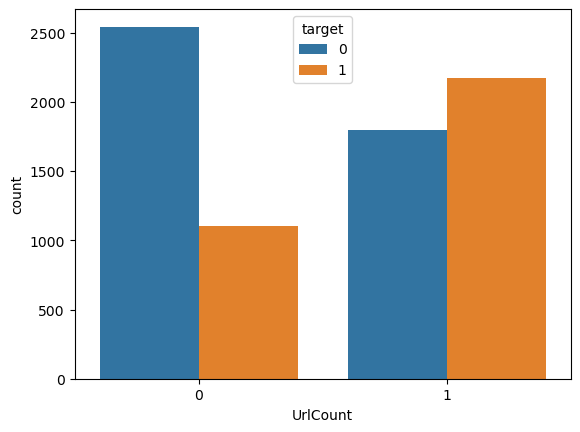

In [250]:
sns.countplot(x="UrlCount",data=train,hue="target")

<AxesSubplot:xlabel='HashTagSum', ylabel='count'>

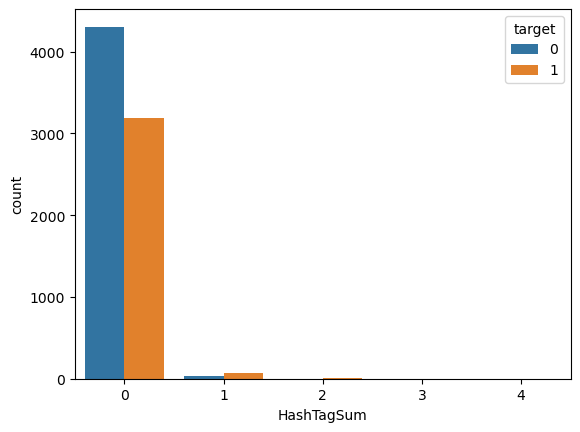

In [251]:
sns.countplot(x="HashTagSum",data=train,hue="target")

In [252]:
train.head()

,id,keyword,location,text,target,HashtagWords,HashTagSum,mention,SentimentScore,UrlCount,cleaned_text,Trigrams,oov,noun,adj,adv,verb,punct,det,part
0,1,earthquake,Others,Our Deeds are the Reason of this #earthquake M...,1,earthquake,1,None,0.000,0,Our Deeds are the Reason of this #earthquake M...,"[Our Deeds are, Deeds are the, are the Reason,...",0,3,0,0,0,0,2,0
1,4,fire,Canada,Forest fire near La Ronge Sask. Canada,1,None,0,None,0.286,0,Forest fire near La Ronge Sask. Canada,"[Forest fire near, fire near La, near La Ronge...",0,1,0,0,0,1,0,0
2,5,evacuation,Others,All residents asked to 'shelter in place' are ...,1,None,0,None,0.095,0,All residents asked to 'shelter in place' are ...,"[All residents asked, residents asked to, aske...",0,7,1,0,0,3,2,1
3,6,wildfires,California,"13,000 people receive #wildfires evacuation or...",1,wildfires,1,None,0.000,0,", people receive #wildfires evacuation orders ...","[13,000 people receive, people receive #, rece...",0,4,0,0,0,0,0,0
4,7,smoke,Alaska,Just got sent this photo from Ruby #Alaska as ...,1,wildfires,1,None,0.000,0,Just got sent this photo from Ruby #Alaska as ...,"[Just got sent, got sent this, sent this photo...",0,4,0,1,0,0,3,0


<AxesSubplot:xlabel='noun', ylabel='count'>

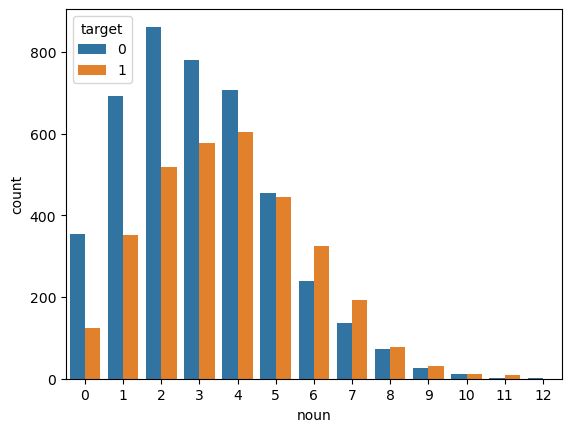

In [253]:
sns.countplot(x="noun",data=train,hue="target")

In [254]:
train.corr()["target"]

id                0.060781
target            1.000000
HashTagSum        0.075032
SentimentScore    0.124187
UrlCount          0.247134
oov               0.038573
noun              0.164720
adj               0.038008
adv              -0.113162
verb                   NaN
punct            -0.038542
det              -0.028813
part             -0.079962
Name: target, dtype: float64

In [255]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vectorize=TfidfVectorizer(analyzer="word")
words=train["text"][0]
words=words.split()
words
words=vectorize.fit_transform(words)
vectorize.vocabulary_

{'our': 8,
 'deeds': 3,
 'are': 2,
 'the': 10,
 'reason': 9,
 'of': 7,
 'this': 11,
 'earthquake': 4,
 'may': 6,
 'allah': 1,
 'forgive': 5,
 'us': 12,
 'all': 0}

In [256]:
# train["text"]=train["text"].apply(lambda x:x.split())

In [257]:
train["TextTFIDF"]=list(vectorize.fit_transform(train["text"].values).toarray())
# tfidf=tfidf.toarray()
# train["TextTFIDF"]=list(tfidf)

In [258]:
train["hashVec"]=list(vectorize.fit_transform(train["HashtagWords"]).toarray())
# hashVec=hashVec.toarray()
# train["hastagWordsVec"]=list(hashVec)

In [259]:
train.head()

,id,keyword,location,text,target,HashtagWords,HashTagSum,mention,SentimentScore,UrlCount,...,oov,noun,adj,adv,verb,punct,det,part,TextTFIDF,hastagWordsVec
0,1,earthquake,Others,Our Deeds are the Reason of this #earthquake M...,1,earthquake,1,None,0.000,0,...,0,3,0,0,0,0,2,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,4,fire,Canada,Forest fire near La Ronge Sask. Canada,1,None,0,None,0.286,0,...,0,1,0,0,0,1,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,5,evacuation,Others,All residents asked to 'shelter in place' are ...,1,None,0,None,0.095,0,...,0,7,1,0,0,3,2,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,6,wildfires,California,"13,000 people receive #wildfires evacuation or...",1,wildfires,1,None,0.000,0,...,0,4,0,0,0,0,0,0,"[0.0, 0.41744665140268544, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,7,smoke,Alaska,Just got sent this photo from Ruby #Alaska as ...,1,wildfires,1,None,0.000,0,...,0,4,0,1,0,0,3,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [267]:
trivectorize=TfidfVectorizer(ngram_range=(3,3))
CVectorize=CountVectorizer()
train["trigramTFIDF"]=list(trivectorize.fit_transform(train["text"]).toarray())
train["locationVec"]=list(CVectorize.fit_transform(train["location"]).toarray())
train["keyword"]=train["keyword"].astype("str")
train["keywordVec"]=list(CVectorize.fit_transform(train["keyword"]).toarray())
# trigramTFIDFarr=trigramTFIDF.toarray()
# train["TrigramsVec"]=list(trigramTFIDFarr)

In [268]:
train.head()

,id,keyword,location,text,target,HashtagWords,HashTagSum,mention,SentimentScore,UrlCount,...,adv,verb,punct,det,part,TextTFIDF,hastagWordsVec,trigramTFIDF,locationVec,keywordVec
0,1,earthquake,Others,Our Deeds are the Reason of this #earthquake M...,1,earthquake,1,None,0.000,0,...,0,0,0,2,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,4,fire,Canada,Forest fire near La Ronge Sask. Canada,1,None,0,None,0.286,0,...,0,0,1,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,5,evacuation,Others,All residents asked to 'shelter in place' are ...,1,None,0,None,0.095,0,...,0,0,3,2,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,6,wildfires,California,"13,000 people receive #wildfires evacuation or...",1,wildfires,1,None,0.000,0,...,0,0,0,0,0,"[0.0, 0.41744665140268544, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,7,smoke,Alaska,Just got sent this photo from Ruby #Alaska as ...,1,wildfires,1,None,0.000,0,...,1,0,0,3,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [262]:
train.dtypes

id                  int64
keyword            object
location           object
text               object
target              int64
HashtagWords       object
HashTagSum          int64
mention            object
SentimentScore    float64
UrlCount            int64
cleaned_text       object
Trigrams           object
oov                 int64
noun                int64
adj                 int64
adv                 int64
verb                int64
punct               int64
det                 int64
part                int64
TextTFIDF          object
hastagWordsVec     object
trigramTFIDF       object
locationVec        object
dtype: object